importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as ssparse
from es_appm_445_2019.weighted_jacobi import weighted_jacobi
from es_appm_445_2019.utils import iter_solve,residual
from es_appm_445_2019.mg_utils import get_A_neumann,get_init_neumann,get_I_h_2h,get_I_2h_h

set problem parameters and generate initial vector, rhs, A-matrix, up-sampling and down-sampling operators.

In [2]:
A = get_A_neumann(65)
x = get_init_neumann(65)    
b = np.zeros(65)

I_up   = get_I_2h_h(67,33)[1:-1,:]
I_down = 0.5*(I_up.transpose())

plot initial guess

(-1, 1)

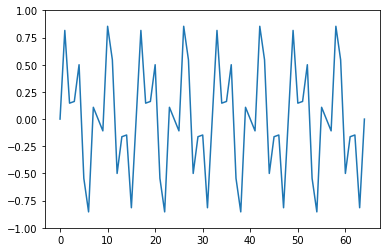

In [3]:
plt.plot(x)
plt.ylim(-1,1)

fine grid sweep using weighted jacobi

In [4]:
G,b1 = weighted_jacobi(A,b,2/3)
y,r = iter_solve(G,b1,A,b,x,3,1e-7)
R = b - A@y

100%|██████████| 3/3 [00:00<00:00, 920.21it/s]


print mean of solution and subtract it from solution to enfore zero mean uniqueness

In [5]:
print(np.sum(y))
y = y - np.sum(y)/(len(y))

-1.9984014443252818e-15


plot solution at current stage and initial guess

(-1, 1)

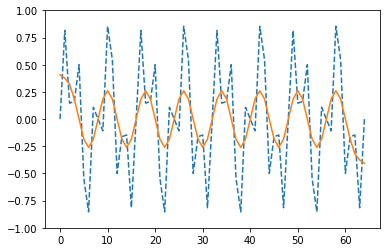

In [6]:
plt.plot(x,'--')
plt.plot(y)
plt.ylim(-1,1)

downsample the residue, initialize coarse grid parameters and finally run coarse sweep

In [7]:
r_coarse = I_down@R

In [8]:
A_2h = get_A_neumann(33)

x_2h = np.zeros(33)
b_2h = r_coarse

G,b1 = weighted_jacobi(A_2h,b_2h,2/3)
y_2h,r_2h = iter_solve(G,b1,A_2h,b_2h,x_2h,3,1e-7)

100%|██████████| 3/3 [00:00<00:00, 4663.79it/s]


print mean of solution and subtract it from solution to enfore zero mean uniqueness

In [9]:
print(np.sum(y_2h))
y_2h = y_2h - np.sum(y_2h)/(len(y_2h))

-2.7755575615628914e-17


up sample the error, correct the fine grid solution and plot

In [10]:
y = y + I_up@y_2h

(-1, 1)

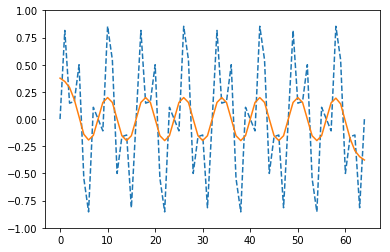

In [11]:
plt.plot(x,'--')
plt.plot(y)
plt.ylim(-1,1)

run fine grid sweep again using weighted jacobi

In [12]:
G,b1 = weighted_jacobi(A,b,2/3)
y,r = iter_solve(G,b1,A,b,y,3,1e-7)
R = b - A@y

100%|██████████| 3/3 [00:00<00:00, 3016.04it/s]


plot solution at current stage and initial guess

(-1, 1)

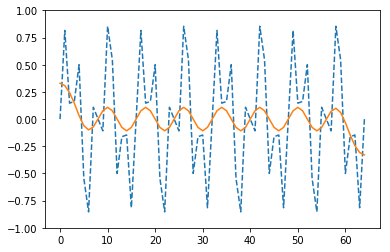

In [13]:
plt.plot(x,'--')
plt.plot(y)
plt.ylim(-1,1)